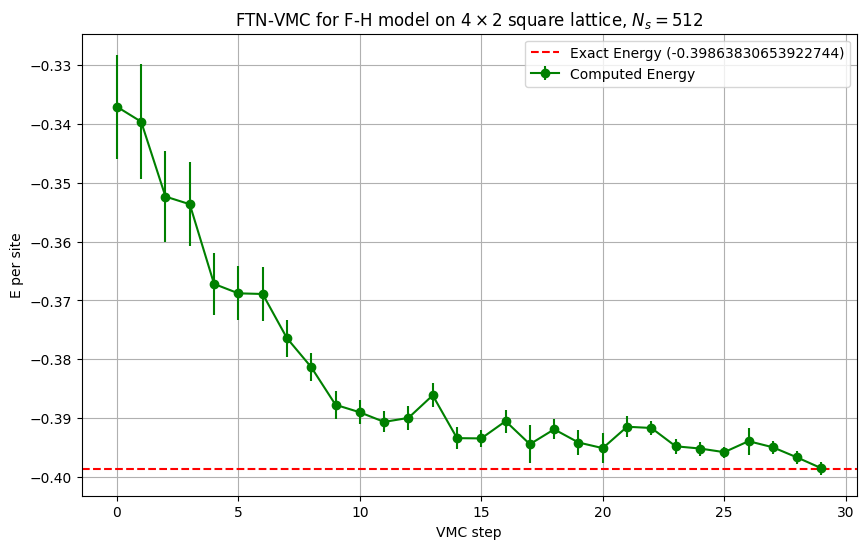

In [9]:
import matplotlib.pyplot as plt

N = 8
samplesize = 512
# File name (update with your file path)
file_name = f'test{samplesize}.txt'

# Initialize lists to store data
variational_steps = []
energies = []
errors = []

# Read the data from the text file
with open(file_name, 'r') as file:
    for line in file:
        if line.startswith('Variational step'):
            step = int(line.split()[2].strip())  # Extract step number
            variational_steps.append(step)
        elif line.startswith('Energy:'):
            parts = line.split(',')
            energy = float(parts[0].split(':')[1].strip())  # Extract energy value
            error = float(parts[1].split(':')[1].strip())  # Extract error value
            energies.append(energy/N)
            errors.append(error/N)

# Exact energy
exact_energy = -3.1891064523138195/N

# Plot the energies and exact energy line
plt.figure(figsize=(10, 6))
plt.errorbar(variational_steps, energies, yerr=errors, fmt='o', linestyle='-', color='g', label='Computed Energy')
plt.axhline(y=exact_energy, color='r', linestyle='--', label=f'Exact Energy ({exact_energy})')
plt.title(r'FTN-VMC for F-H model on $4\times 2$ square lattice, $N_s={}$'.format(samplesize))
plt.xlabel('VMC step')
plt.ylabel('E per site')
plt.legend()
plt.grid(True)
plt.show()
